In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline  
data=pd.read_csv("dataset/up_data.csv")
data.shape

(65, 3)

In [2]:
y=data['2'] # length
x=data["3"] # Resistance
x1=[]
y1=[]
x2=[]
x3=[]
for i in range(64):
    x1.append(x[i])
    y1.append(y[i])
    x2.append((x[i]**2)*0.0001) # 2차 함수 : 0.0001
    x3.append((x[i]**3)*0.00000001)
W1=tf.Variable(tf.random_normal([1]),name='weight1')
W2=tf.Variable(tf.random_normal([1]),name='weight2')
W3=tf.Variable(tf.random_normal([1]),name='weight3')
B=tf.Variable(tf.random_normal([1]),name='bias')
X1=tf.placeholder(tf.float32)
X2=tf.placeholder(tf.float32)
X3=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

In [3]:
hypothesis=B+X1*W1
cost=tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000000001) # 2차 함수 : 0.000000001
train=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [4]:
for step in range(10000):
    cost_val, hy_val, _,w1,b = sess.run([cost, hypothesis, train,W1,B],
                                   feed_dict={X1:x1, Y:y1})
    if step % 2000 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val,"\nW1:{},B:{}".format(w1,b))

0 Cost:  102381410.0 
Prediction:
 [ 1322.9363  1333.1292  1333.1292  1333.1292  1322.9363  1333.1292
  1343.352   1333.1292  1661.2444  2195.388   2753.9458  3365.0215
  3814.3335  4320.4487  4735.5234  5180.686   5591.958   5912.4155
  6298.3447  6654.662   6974.9985  7310.122   7661.0757  8029.011
  8316.86    8548.208   8890.658   9139.178   9432.565   9697.863
  9931.958  10172.495  10336.561  10461.62   10891.421  11069.143
 11159.293  11481.811  11388.536  11815.652  12061.372  12211.819
 12364.59   11913.196  12624.531  12783.783  12891.3545 13109.945
 13677.442  13446.744  13446.744  13561.461  13677.442  13735.913
 13853.821  14033.156  14093.612  14093.612  14277.007  14277.007
 14338.827  14401.002  14463.531  14526.417 ] 
W1:[0.7544613],B:[-2.3503275]
2000 Cost:  0.5648013 
Prediction:
 [-1.58385    -1.5779546  -1.5779546  -1.5779546  -1.58385    -1.5779546
 -1.5720417  -1.5779546  -1.3881774  -1.0792361  -0.75617397 -0.4027362
 -0.14286041  0.14986968  0.38994312  0.64741

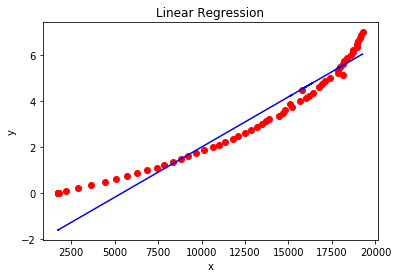

In [5]:
# W1:[0.00016793],B:[-0.88223064]

plt.figure(1)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
# 주어진 데이터들을 점으로 표시
plt.plot(x1,y1, 'ro')
# 예측한 일차함수를 직선으로 표시
plt.plot(x1,sess.run(B)+x1*sess.run(W1), 'b')
# X=5 일때의 계산 값
plt.show()